In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv('Dataset/pricerunner_aggregate.csv')
dataset

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges


In [9]:
dataset.isnull().any()

Product ID         False
Product Title      False
 Merchant ID       False
 Cluster ID        False
 Cluster Label     False
 Category ID       False
 Category Label    False
dtype: bool

In [10]:
#removing useless features
dataset = dataset.drop(columns=['Product ID',' Cluster Label', ' Category Label'])
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,apple iphone 8 plus 64gb silver,1,1,2612
1,apple iphone 8 plus 64 gb spacegrau,2,1,2612
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,2612
3,apple iphone 8 plus 64gb space grey,4,1,2612
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,2612
...,...,...,...,...
35306,smeg fab28 60cm retro style right hand hinge f...,59,47517,2623
35307,smeg fab28 60cm retro style left hand hinge fr...,59,47518,2623
35308,smeg fab28 60cm retro style left hand hinge fr...,59,47519,2623
35309,candy 60cm built under larder fridge cru160nek,125,47524,2623


In [12]:
#Text cleaning
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

def clean_cols(data: pd.DataFrame, cat_cols: list):
    for col in cat_cols:
        data[col] = data[col].apply(clean_text)

dataset['Product Title'] = dataset['Product Title'].map(lambda x: clean_text(x))
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,apple iphone plus silver,1,1,2612
1,apple iphone plus gb spacegrau,2,1,2612
2,apple a iphone plus sim free smart...,3,1,2612
3,apple iphone plus space grey,4,1,2612
4,apple iphone plus gold unlocked sim ...,5,1,2612
...,...,...,...,...
35306,smeg retro style right hand hinge fridge w...,59,47517,2623
35307,smeg retro style left hand hinge fridge wi...,59,47518,2623
35308,smeg retro style left hand hinge fridge wi...,59,47519,2623
35309,candy built under larder fridge,125,47524,2623


In [14]:
# tokenizing rows
import nltk
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
dataset['Product Title'] = dataset['Product Title'].apply(lambda x: tokenizer.tokenize(x))
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,"[apple, iphone, plus, silver]",1,1,2612
1,"[apple, iphone, plus, gb, spacegrau]",2,1,2612
2,"[apple, a, iphone, plus, sim, free, smartphone...",3,1,2612
3,"[apple, iphone, plus, space, grey]",4,1,2612
4,"[apple, iphone, plus, gold, unlocked, sim, free]",5,1,2612
...,...,...,...,...
35306,"[smeg, retro, style, right, hand, hinge, fridg...",59,47517,2623
35307,"[smeg, retro, style, left, hand, hinge, fridge...",59,47518,2623
35308,"[smeg, retro, style, left, hand, hinge, fridge...",59,47519,2623
35309,"[candy, built, under, larder, fridge]",125,47524,2623


In [15]:
# stopwords removal
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_word_en_fa = list(set(stopwords.words('english')))
    words = [w for w in text if w not in stop_word_en_fa]
    return words

dataset['Product Title'] = dataset['Product Title'].map(lambda x: remove_stopwords(x))
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,"[apple, iphone, plus, silver]",1,1,2612
1,"[apple, iphone, plus, gb, spacegrau]",2,1,2612
2,"[apple, iphone, plus, sim, free, smartphone, g...",3,1,2612
3,"[apple, iphone, plus, space, grey]",4,1,2612
4,"[apple, iphone, plus, gold, unlocked, sim, free]",5,1,2612
...,...,...,...,...
35306,"[smeg, retro, style, right, hand, hinge, fridg...",59,47517,2623
35307,"[smeg, retro, style, left, hand, hinge, fridge...",59,47518,2623
35308,"[smeg, retro, style, left, hand, hinge, fridge...",59,47519,2623
35309,"[candy, built, larder, fridge]",125,47524,2623


In [16]:
# Stemming & lemmatization

stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()



def apply_stm_lem(tokens):
    words = [stemmer.stem(token) for token in tokens]
    words = [lemmatizer.lemmatize(token) for token in words]

    return words

dataset['Product Title'] = dataset['Product Title'].map(lambda x: apply_stm_lem(x))
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,"[appl, iphon, plu, silver]",1,1,2612
1,"[appl, iphon, plu, gb, spacegrau]",2,1,2612
2,"[appl, iphon, plu, sim, free, smartphon, gold]",3,1,2612
3,"[appl, iphon, plu, space, grey]",4,1,2612
4,"[appl, iphon, plu, gold, unlock, sim, free]",5,1,2612
...,...,...,...,...
35306,"[smeg, retro, style, right, hand, hing, fridg,...",59,47517,2623
35307,"[smeg, retro, style, left, hand, hing, fridg, ...",59,47518,2623
35308,"[smeg, retro, style, left, hand, hing, fridg, ...",59,47519,2623
35309,"[candi, built, larder, fridg]",125,47524,2623


In [17]:
# length filtering
def length_filter(x):
    return [word for word in x if len(word) >= 2]

dataset['Product Title'] = dataset['Product Title'].map(lambda x: length_filter(x))
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,"[appl, iphon, plu, silver]",1,1,2612
1,"[appl, iphon, plu, gb, spacegrau]",2,1,2612
2,"[appl, iphon, plu, sim, free, smartphon, gold]",3,1,2612
3,"[appl, iphon, plu, space, grey]",4,1,2612
4,"[appl, iphon, plu, gold, unlock, sim, free]",5,1,2612
...,...,...,...,...
35306,"[smeg, retro, style, right, hand, hing, fridg,...",59,47517,2623
35307,"[smeg, retro, style, left, hand, hing, fridg, ...",59,47518,2623
35308,"[smeg, retro, style, left, hand, hing, fridg, ...",59,47519,2623
35309,"[candi, built, larder, fridg]",125,47524,2623


In [18]:
#combining words in any rows

def combine_text(list_of_text):
    return ' '.join(list_of_text)

dataset['Product Title'] = dataset['Product Title'].map(lambda x: combine_text(x))
dataset

,Product Title,Merchant ID,Cluster ID,Category ID
0,appl iphon plu silver,1,1,2612
1,appl iphon plu gb spacegrau,2,1,2612
2,appl iphon plu sim free smartphon gold,3,1,2612
3,appl iphon plu space grey,4,1,2612
4,appl iphon plu gold unlock sim free,5,1,2612
...,...,...,...,...
35306,smeg retro style right hand hing fridg icebox ...,59,47517,2623
35307,smeg retro style left hand hing fridg icebox red,59,47518,2623
35308,smeg retro style left hand hing fridg icebox pink,59,47519,2623
35309,candi built larder fridg,125,47524,2623


In [52]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns=' Category ID'), dataset[' Category ID'], test_size=0.2, random_state=42)

In [53]:
# TODO: Implement and train the model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

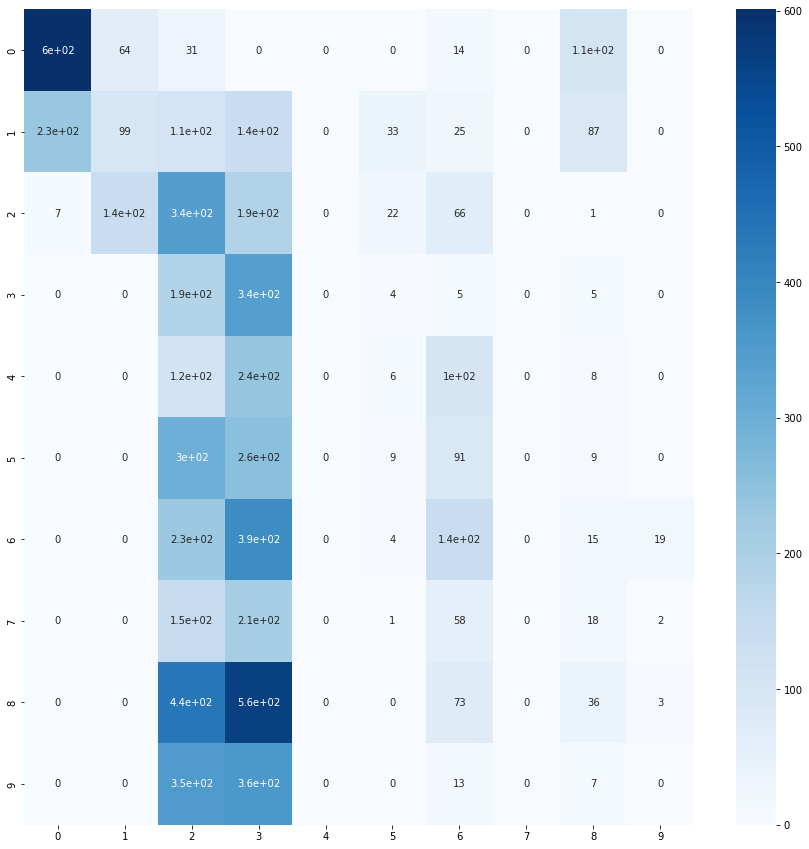

              precision    recall  f1-score   support

        2612       0.71      0.73      0.72       818
        2614       0.32      0.14      0.19       723
        2615       0.15      0.45      0.23       771
        2617       0.13      0.63      0.21       542
        2618       0.00      0.00      0.00       469
        2619       0.11      0.01      0.02       662
        2620       0.24      0.18      0.20       796
        2621       0.00      0.00      0.00       439
        2622       0.12      0.03      0.05      1115
        2623       0.00      0.00      0.00       728

    accuracy                           0.22      7063
   macro avg       0.18      0.22      0.16      7063
weighted avg       0.20      0.22      0.18      7063



C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:

# TODO: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix


y_pred = mnb.predict(x_test)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred, zero_division='warn'))